# How have the costs of staying at an AirBNB in Boston and Seattle changed over time?

In [13]:
#import libraries
import pandas as pd 
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

### Read in csv files from the airbnb data sets

In [14]:
#read in boston data
boston_calender = pd.read_csv('BostonData/calendar.csv')
boston_listings = pd.read_csv('BostonData/listings.csv')
boston_reviews = pd.read_csv('BostonData/reviews.csv')

#read in seattle
seattle_calender = pd.read_csv('SeattleData/calendar.csv')
seattle_listings = pd.read_csv('SeattleData/listings.csv')
seattle_reviews = pd.read_csv('SeattleData/reviews.csv')

### Take a look at all of the dataframes

In [15]:
boston_calender.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [16]:
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [17]:
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [18]:
seattle_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [19]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Process date and time data into one data frame for analysis

In [21]:
#create new dataframes just consisting of date and prices of seattle and washington
#concat dates and prices of seattle and boston into one dataframe
boston_dates_prices = boston_calender[["date","price"]]
seattle_dates_prices = seattle_calender[["date","price"]]
#rename price column names

combined_dates_prices = pd.concat([boston_dates_prices,seattle_dates_prices],axis= 0,sort = True)

#drop the na values from the data frame
combined_dates_prices.dropna(axis=0,inplace=True)

#remove dollar signs and commas from price
combined_dates_prices.price = combined_dates_prices.price.replace({"\$":'',",":''},regex= True)
#convert prices from object to float type
combined_dates_prices.price = combined_dates_prices.price.astype('float')

#convert dates into datetime64 data type
combined_dates_prices.date = combined_dates_prices.date.astype('datetime64')
combined_dates_prices.head()

,date,price
365,2017-08-22,65.0
366,2017-08-21,65.0
367,2017-08-20,65.0
368,2017-08-19,75.0
369,2017-08-18,75.0


### Visualize the data

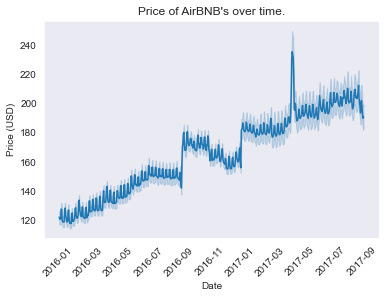

In [22]:

sns.set_style("dark")
plot = sns.lineplot(data = combined_dates_prices, x = "date" , y = "price")
plot.set_title("Price of AirBNB's over time.")
plot.set_ylabel("Price (USD)")
plot.set_xlabel("Date")
plot.tick_params(axis = 'x', labelsize = 10, rotation = 45)



### Check for correlation

In [23]:
#create a new data frame by adding years and months (months is divided by 12 so it is converted) of dates
combined_dates_prices["month_year"] = (combined_dates_prices.date.dt.month /12) + combined_dates_prices.date.dt.year
#check correlation between price and date using pearson method
combined_dates_prices.price.corr(combined_dates_prices.month_year)

0.15898296958698396

### Create a linear regression model to see the approximate rate of change

In [24]:
#instantiate the model
model = linear_model.LinearRegression()
model.fit(combined_dates_prices["month_year"].to_numpy().reshape(-1,1),combined_dates_prices["price"])
#print out the slope
model.coef_

array([52.36632683])

# Conclusions
From the the graph, it is clear that AirBNB prices has increased over time, and the Pearson correlation coefficient of 0.159 indiciates a postive correleation between the two factors. Lastly, the linear regression model shows a slope of 52.37 USD / year, showing that AirBNB prices are rising by quite a significant amount per year in Boston and Seattle.